In [1]:
# 1️⃣ افزودن مسیر پروژه به sys.path
import sys
from pathlib import Path

notebook_path = Path().resolve()        # مسیر نوت‌بوک
project_root = notebook_path.parent     # Codes_V3

if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))

print("Project root:", project_root)
print("sys.path contains project root?", str(project_root) in sys.path)

# 2️⃣ import loader
from raw_data.loaders.txt_loader import TXTMultiStateLoader
from raw_data.iq_container import RawIQData

# 3️⃣ مسیر داده‌ها
data_dir = project_root / "raw_data" / "experiments" / "4qubit_run01"
print("Path exists?", data_dir.exists())

# 4️⃣ ساخت loader
loader = TXTMultiStateLoader(
    directory=str(data_dir),
    n_qubits=4,
)

# 5️⃣ بارگذاری داده‌ها
raw: RawIQData = loader.load()

# 6️⃣ نمایش اطلاعات
print("Raw data object:", raw)
print("Shape of data:", raw.data.shape)
print("First 5 labels:\n", raw.metadata["labels"][:5])
print("State files:", raw.metadata["state_files"])

Project root: D:\SharifUniversity\N_Qubits_BinaryClassification\Codes_V3
sys.path contains project root? True
Path exists? True
Raw data object: RawIQData(shots=16, n_qubits=4, time_steps=1000)
Shape of data: (16, 4, 1000, 2)
First 5 labels:
 [[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]
State files: ['0000.txt', '0001.txt', '0010.txt', '0011.txt', '0100.txt', '0101.txt', '0110.txt', '0111.txt', '1000.txt', '1001.txt', '1010.txt', '1011.txt', '1100.txt', '1101.txt', '1110.txt', '1111.txt']


In [ ]:
# import os
# print(os.getcwd())
# ----------------------
# import sys
# sys.modules.pop("raw_data.loaders.txtx_loader", None)
# sys.modules.pop("raw_data.loaders.txt_loader", None)
## ----------------------
# from pathlib import Path

# notebook_path = Path().resolve()  # مسیر نوت‌بوک demo
# project_root = notebook_path.parent  # Codes_V3
# data_dir = project_root / "raw_data" / "experiments" / "4qubit_run01"

# print("Path exists?", data_dir.exists())

### Plotting

In [3]:
from raw_data.loaders.txt_loader import TXTMultiStateLoader

from preprocessing.plotting.iq_scatter import plot_iq_scatter
from preprocessing.plotting.histograms import plot_iq_histograms
from preprocessing.plotting.gaussian_ellipses import plot_gaussian_ellipse

loader = TXTMultiStateLoader(
    directory="../raw_data/experiments/4qubit_run01",
    n_qubits=4,
)

# raw = loader.load()

# plot_iq_scatter(raw, shot=0, qubit=2)
# plot_iq_histograms(raw, qubit=2)
# plot_gaussian_ellipse(raw, shot=0)


Raw data object: RawIQData(shots=16, n_qubits=4, time_steps=1000)
Data shape: (16, 4, 1000, 2)
State files: ['0000.txt', '0001.txt', '0010.txt', '0011.txt', '0100.txt', '0101.txt', '0110.txt', '0111.txt', '1000.txt', '1001.txt', '1010.txt', '1011.txt', '1100.txt', '1101.txt', '1110.txt', '1111.txt']


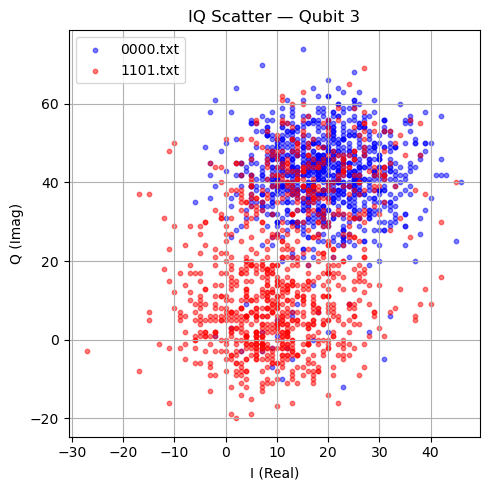

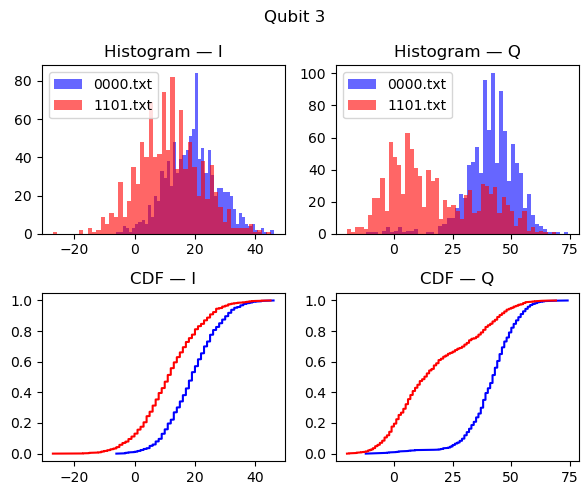

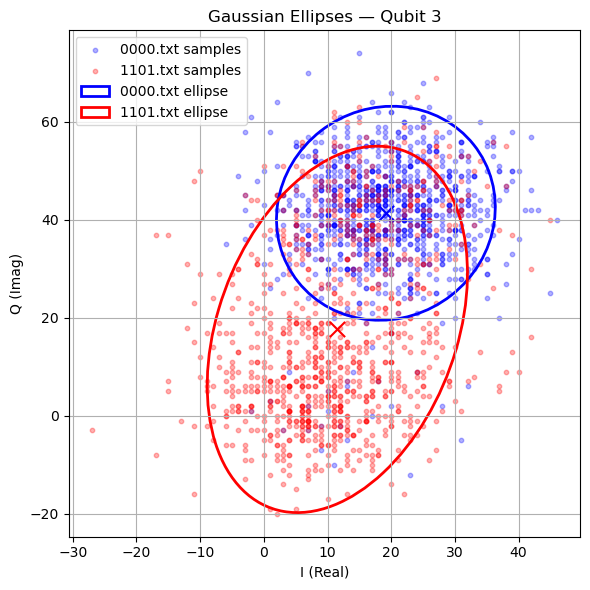

In [37]:
# -----------------------------------------------------------
# Imports
# -----------------------------------------------------------
from raw_data.loaders.txt_loader import TXTMultiStateLoader
# from preprocessing.plotting.compare_states import *
from preprocessing.plotting.iq_scatter import plot_iq_scatter
from preprocessing.plotting.histograms import plot_iq_histograms
from preprocessing.plotting.gaussian_ellipses import plot_gaussian_ellipse

# -----------------------------------------------------------
# Load raw data
# -----------------------------------------------------------
loader = TXTMultiStateLoader(
    directory="../raw_data/experiments/4qubit_run01",
    n_qubits=4,
)
raw = loader.load()

print("Raw data object:", raw)
print("Data shape:", raw.data.shape)
print("State files:", raw.metadata["state_files"])

# -----------------------------------------------------------
# Select two states and a qubit for comparison
# -----------------------------------------------------------
state_idx_1 = 0  # index of first state (e.g., '0000.txt')
state_idx_2 = 13 # index of second state (e.g., '1101.txt')
qubit_index = 2  # 0 → qubit1, 1 → qubit2, etc.

# Extract IQ samples for chosen shot and qubit
# Here we use the first shot of each state
iq_samples_1 = raw.data[state_idx_1, qubit_index, :, :]
iq_samples_2 = raw.data[state_idx_2, qubit_index, :, :]

# Optional: state labels for plotting
label1 = raw.metadata["state_files"][state_idx_1]
label2 = raw.metadata["state_files"][state_idx_2]

# -----------------------------------------------------------
# Plot IQ scatter
# -----------------------------------------------------------
plot_iq_scatter(iq_samples_1, iq_samples_2,
                label1=label1, label2=label2, qubit_index=qubit_index)

# -----------------------------------------------------------
# Plot IQ histograms
# -----------------------------------------------------------
plot_iq_histograms(iq_samples_1, iq_samples_2,
                   label1=label1, label2=label2, qubit_index=qubit_index)
# plot_iq_scatter_compare(iq_samples_1, iq_samples_2,
#                         label1=label1, label2=label2, qubit_index=qubit_index)
# -----------------------------------------------------------
# Plot Gaussian ellipses
# -----------------------------------------------------------
plot_gaussian_ellipse(iq_samples_1, iq_samples_2,
                      label1=label1, label2=label2, qubit_index=qubit_index)


#### Compare states


Project root: D:\SharifUniversity\N_Qubits_BinaryClassification\Codes_V3
sys.path contains project root? True
Raw data object: RawIQData(shots=16, n_qubits=4, time_steps=1000)
Data shape: (16, 4, 1000, 2)
First 5 labels:
 [[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]
State files: ['0000.txt', '0001.txt', '0010.txt', '0011.txt', '0100.txt', '0101.txt', '0110.txt', '0111.txt', '1000.txt', '1001.txt', '1010.txt', '1011.txt', '1100.txt', '1101.txt', '1110.txt', '1111.txt']


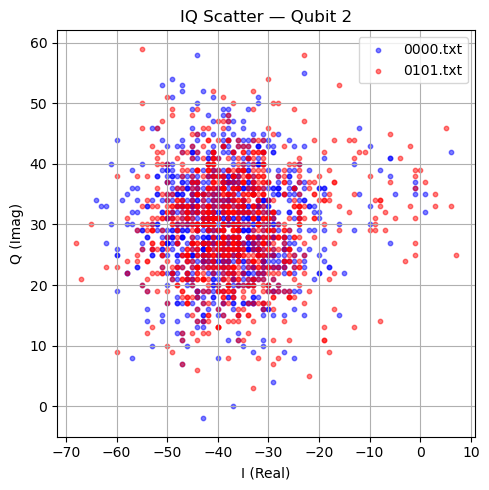

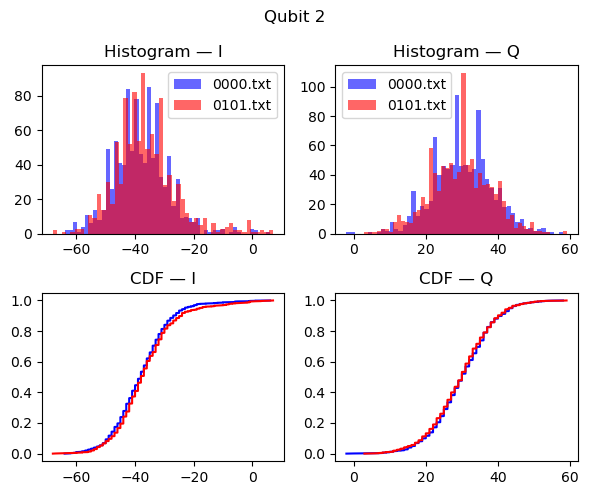

TypeError: plot_gaussian_ellipses() got an unexpected keyword argument 'label1'

In [38]:
# -------------------------------------------
# Jupyter Notebook: Compare Two States for a Qubit
# -------------------------------------------

from pathlib import Path
import sys

# --- اطمینان از قرار داشتن مسیر پروژه در sys.path ---
notebook_path = Path().resolve()               # مسیر نوت بوک
project_root = notebook_path.parent           # مسیر Codes_V3
if str(project_root) not in sys.path:
    sys.path.append(str(project_root))
print("Project root:", project_root)
print("sys.path contains project root?", str(project_root) in sys.path)

# --- Load the loader ---
from raw_data.loaders.txt_loader import TXTMultiStateLoader
from preprocessing.plotting.iq_scatter import plot_iq_scatter
from preprocessing.plotting.histograms import plot_iq_histograms
from preprocessing.plotting.gaussian_ellipses import plot_gaussian_ellipse

# --- بارگذاری داده‌ها ---
data_dir = project_root / "raw_data" / "experiments" / "4qubit_run01"

loader = TXTMultiStateLoader(directory=str(data_dir), n_qubits=4)
raw = loader.load()

print("Raw data object:", raw)
print("Data shape:", raw.data.shape)
print("First 5 labels:\n", raw.metadata["labels"][:5])
print("State files:", raw.metadata["state_files"])

# --- انتخاب کیوبیت و دو حالت برای مقایسه ---
qubit_index = 1      # کیوبیت دوم
state_idx_1 = 0      # فایل اول، مثلا '0000.txt'
state_idx_2 = 5      # فایل ششم، مثلا '0101.txt'

# داده‌های IQ برای دو حالت
iq_samples_1 = raw.data[state_idx_1, qubit_index, :, :]
iq_samples_2 = raw.data[state_idx_2, qubit_index, :, :]

# --- رسم IQ scatter ---
plot_iq_scatter(iq_samples_1, iq_samples_2, 
                label1=raw.metadata["state_files"][state_idx_1],
                label2=raw.metadata["state_files"][state_idx_2],
                qubit_index=qubit_index)

# --- رسم هیستوگرام ---
plot_iq_histograms(iq_samples_1, iq_samples_2, 
                   label1=raw.metadata["state_files"][state_idx_1],
                   label2=raw.metadata["state_files"][state_idx_2],
                   qubit_index=qubit_index)

# --- رسم بیضی گاوسی ---
plot_gaussian_ellipses(iq_samples_1, iq_samples_2,
                        label1=raw.metadata["state_files"][state_idx_1],
                        label2=raw.metadata["state_files"][state_idx_2],
                        qubit_index=qubit_index)


In [13]:
# انتخاب شات و کیوبیت
shot = 0
qubit = 2  # کیوبیت سوم

# IQ samples برای رسم: (time_steps, 2)
iq_samples = raw.data[shot, qubit, :, :]

# رسم
plot_iq_scatter(iq_samples, iq_samples, label1="State A", label2="State B", qubit_index=qubit)
plot_iq_histograms(iq_samples, iq_samples, label1="State A", label2="State B", qubit_index=qubit)
plot_gaussian_ellipse(iq_samples, iq_samples, label1="State A", label2="State B", qubit_index=qubit)


TypeError: plot_iq_scatter() got an unexpected keyword argument 'label1'